# **decision tree / random Forest**

Attention: 
- I renamed the columns by replace spaces with underscores. This might make error-messages


In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import seaborn as sns


df=pd.read_csv('Carbon_Emission.csv',sep=";")

# change display settings to show all columns
pd.set_option('display.max_columns', None)

# rename columns: replace spaces with underscores
df.columns = df.columns.str.replace(' ', '_')

df.head()

,Body_Type,Sex,Diet,How_Often_Shower,Heating_Energy_Source,Transport,Vehicle_Type,Social_Activity,Monthly_Grocery_Bill,Frequency_of_Traveling_by_Air,Vehicle_Monthly_Distance_Km,Waste_Bag_Size,Waste_Bag_Weekly_Count,How_Long_TV_PC_Daily_Hour,How_Many_New_Clothes_Monthly,How_Long_Internet_Daily_Hour,Energy_efficiency,Recycling,Cooking_With,CarbonEmission
0,overweight,female,pescatarian,daily,coal,public,NaN,often,230,frequently,210,large,4,7,26,1,No,['Metal'],"['Stove', 'Oven']",2238
1,obese,female,vegetarian,less frequently,natural gas,walk/bicycle,NaN,often,114,rarely,9,extra large,3,9,38,5,No,['Metal'],"['Stove', 'Microwave']",1892
2,overweight,male,omnivore,more frequently,wood,private,petrol,never,138,never,2472,small,1,14,47,6,Sometimes,['Metal'],"['Oven', 'Microwave']",2595
3,overweight,male,omnivore,twice a day,wood,walk/bicycle,NaN,sometimes,157,rarely,74,medium,3,20,5,7,Sometimes,"['Paper', 'Plastic', 'Glass', 'Metal']","['Microwave', 'Grill', 'Airfryer']",1074
4,obese,female,vegetarian,daily,coal,private,diesel,often,266,very frequently,8457,large,1,3,5,6,Yes,['Paper'],['Oven'],4743


# change Regression-Problem to Classification-Problem

In [2]:
# Definiere die Grenzen der Drittel
lower_bound = df['CarbonEmission'].min()
upper_bound = df['CarbonEmission'].max()

# Teile das Intervall in drei Drittel auf
first_third = lower_bound + (upper_bound - lower_bound) / 3
second_third = lower_bound + 2 * (upper_bound - lower_bound) / 3

# Erstelle die neue Spalte basierend auf den Bedingungen
df['how_bad_is_my_CE'] = pd.cut(df['CarbonEmission'],
                                bins=[lower_bound, first_third, second_third, upper_bound],
                                labels=['bad', 'very bad', 'very very bad'],
                                include_lowest=True)

df

,Body_Type,Sex,Diet,How_Often_Shower,Heating_Energy_Source,Transport,Vehicle_Type,Social_Activity,Monthly_Grocery_Bill,Frequency_of_Traveling_by_Air,Vehicle_Monthly_Distance_Km,Waste_Bag_Size,Waste_Bag_Weekly_Count,How_Long_TV_PC_Daily_Hour,How_Many_New_Clothes_Monthly,How_Long_Internet_Daily_Hour,Energy_efficiency,Recycling,Cooking_With,CarbonEmission,how_bad_is_my_CE
0,overweight,female,pescatarian,daily,coal,public,NaN,often,230,frequently,210,large,4,7,26,1,No,['Metal'],"['Stove', 'Oven']",2238,bad
1,obese,female,vegetarian,less frequently,natural gas,walk/bicycle,NaN,often,114,rarely,9,extra large,3,9,38,5,No,['Metal'],"['Stove', 'Microwave']",1892,bad
2,overweight,male,omnivore,more frequently,wood,private,petrol,never,138,never,2472,small,1,14,47,6,Sometimes,['Metal'],"['Oven', 'Microwave']",2595,bad
3,overweight,male,omnivore,twice a day,wood,walk/bicycle,NaN,sometimes,157,rarely,74,medium,3,20,5,7,Sometimes,"['Paper', 'Plastic', 'Glass', 'Metal']","['Microwave', 'Grill', 'Airfryer']",1074,bad
4,obese,female,vegetarian,daily,coal,private,diesel,often,266,very frequently,8457,large,1,3,5,6,Yes,['Paper'],['Oven'],4743,very bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,obese,male,omnivore,twice a day,coal,private,hybrid,sometimes,230,never,268,medium,5,12,27,9,Yes,[],['Microwave'],2408,bad
9996,normal,female,vegan,twice a day,coal,private,lpg,never,234,frequently,5316,extra large,3,14,8,24,Sometimes,"['Paper', 'Plastic']","['Stove', 'Microwave']",3084,very bad
9997,overweight,female,vegetarian,daily,electricity,walk/bicycle,NaN,sometimes,298,very frequently,96,extra large,5,11,5,24,Yes,"['Paper', 'Plastic', 'Metal']","['Microwave', 'Grill', 'Airfryer']",2377,bad
9998,underweight,male,vegan,more frequently,coal,private,petrol,often,179,rarely,8688,medium,5,19,14,5,Sometimes,"['Paper', 'Metal']","['Stove', 'Microwave', 'Grill', 'Airfryer']",4574,very bad


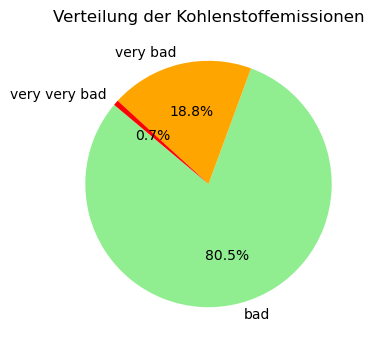

In [3]:
import matplotlib.pyplot as plt

# Zähle die Häufigkeit der einzelnen Kategorien in der Spalte 'how_bad_is_my_CE'
counts = df['how_bad_is_my_CE'].value_counts()

# Erstelle das Kreisdiagramm
plt.figure(figsize=(4, 4))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140, colors=['lightgreen', 'orange', 'red'])

# Füge einen Titel hinzu
plt.title('Verteilung der Kohlenstoffemissionen')

# Zeige das Diagramm an
plt.show()


In [4]:
#chatGPT wrote the code.
#Prompt for chatGPT: "in python. mein dataframe heißt df. eine Spalte heißt 'CarbonEmission'. erstelle mir eine neue spalte. Sie soll heißen "how_bad_is_my_CE". ich möchte dass die Leute gedrittelt werden, entsprechend ihrer CarbonEmission.  Für Leute im niedrigsten Drittel der CarbonEmisson-werte  - trage in Spalte "how_bad_is_my_CE" "bad" als Wert ein.   Für Leute im mittleren Drittel der CarbonEmisson-werte  -  - trage in Spalte "how_bad_is_my_CE" ein "very bad".  Für Leute im obersten Drittel der CarbonEmisson-werte  -  - trage in Spalte "how_bad_is_my_CE" ein "very very bad" "

import pandas as pd

#people in the lower half get in "True" and people in the upper half get a "False"
# Einteilung der CarbonEmission-Werte in zwei Hälften und Zuweisung von True/False
df['lower_half_CE'] = pd.qcut(df['CarbonEmission'], 2, labels=[True, False])
#df['how_bad_is_my_CE2'] = pd.qcut(df['CarbonEmission'], 3, labels=["bad", "very bad", "very very bad"]) #for 3 categories


df

,Body_Type,Sex,Diet,How_Often_Shower,Heating_Energy_Source,Transport,Vehicle_Type,Social_Activity,Monthly_Grocery_Bill,Frequency_of_Traveling_by_Air,Vehicle_Monthly_Distance_Km,Waste_Bag_Size,Waste_Bag_Weekly_Count,How_Long_TV_PC_Daily_Hour,How_Many_New_Clothes_Monthly,How_Long_Internet_Daily_Hour,Energy_efficiency,Recycling,Cooking_With,CarbonEmission,how_bad_is_my_CE,lower_half_CE
0,overweight,female,pescatarian,daily,coal,public,NaN,often,230,frequently,210,large,4,7,26,1,No,['Metal'],"['Stove', 'Oven']",2238,bad,False
1,obese,female,vegetarian,less frequently,natural gas,walk/bicycle,NaN,often,114,rarely,9,extra large,3,9,38,5,No,['Metal'],"['Stove', 'Microwave']",1892,bad,True
2,overweight,male,omnivore,more frequently,wood,private,petrol,never,138,never,2472,small,1,14,47,6,Sometimes,['Metal'],"['Oven', 'Microwave']",2595,bad,False
3,overweight,male,omnivore,twice a day,wood,walk/bicycle,NaN,sometimes,157,rarely,74,medium,3,20,5,7,Sometimes,"['Paper', 'Plastic', 'Glass', 'Metal']","['Microwave', 'Grill', 'Airfryer']",1074,bad,True
4,obese,female,vegetarian,daily,coal,private,diesel,often,266,very frequently,8457,large,1,3,5,6,Yes,['Paper'],['Oven'],4743,very bad,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,obese,male,omnivore,twice a day,coal,private,hybrid,sometimes,230,never,268,medium,5,12,27,9,Yes,[],['Microwave'],2408,bad,False
9996,normal,female,vegan,twice a day,coal,private,lpg,never,234,frequently,5316,extra large,3,14,8,24,Sometimes,"['Paper', 'Plastic']","['Stove', 'Microwave']",3084,very bad,False
9997,overweight,female,vegetarian,daily,electricity,walk/bicycle,NaN,sometimes,298,very frequently,96,extra large,5,11,5,24,Yes,"['Paper', 'Plastic', 'Metal']","['Microwave', 'Grill', 'Airfryer']",2377,bad,False
9998,underweight,male,vegan,more frequently,coal,private,petrol,often,179,rarely,8688,medium,5,19,14,5,Sometimes,"['Paper', 'Metal']","['Stove', 'Microwave', 'Grill', 'Airfryer']",4574,very bad,False


# sorting the variables into groups


| variable type| variables | encoding  |
| -----------  | ----------- | ----------- |
|dependent variable |  CarbonEmission |   |
|Quantitative Variables |  Monthly Grocery Bill, Vehicle Monthly Distance Km, Waste Bag Weekly Count, How Long TV, PC Daily, Hour How Many New Clothes Monthly, How Long Internet Daily Hour |   |
| Ordinal Variables | Body_Type, Diet, How_Often_Shower, Social_Activity, Frequency_of_Traveling_by_Air, Waste_Bag_Size, Energy_efficiency | OrdinalEncoder (*), exclude BodyType |
| Nominal Variables, with one answer | 'Sex', 'Heating_Energy_Source', 'Transport', 'Vehicle Type' | OneHotEncoder (drop 'Sex_male' and drop NaN in 'Vehicle Type') |
| Nominal Variables, with multiple (or zero) answers  | Recycling, Cooking_With | OneHotEncoder (drop Cooking_with_Airfryer)  |

(*) we want for Body-type:'underweight'=0, 'normal'=1, 'overweight'=2, 'obese'=3. with OrdinalEncoder of Scikit-learn we get: normal: 0, obese: 1, overweight: 2, underweigt: 3 - that would be wrong. chatGPT said there is no tool in Scikit-learn to help me so i do the encoding manually

In [5]:
#variables_ordinal =df.select_dtypes(include=['object','category']).drop(['Transport','Vehicle_Type','Recycling','Cooking_With','Sex'],axis=1).columns.tolist()
variables_ordinal = ['Diet','How_Often_Shower','Social_Activity','Frequency_of_Traveling_by_Air','Waste_Bag_Size','Energy_efficiency']
#exclude 'Body_Type'

#variables_quantitative =df.select_dtypes(include=[np.number]).drop('CarbonEmission',axis=1).columns.tolist()
variables_quantitative = ['Monthly_Grocery_Bill', 'Vehicle_Monthly_Distance_Km', 'Waste_Bag_Weekly_Count', 'How_Long_TV_PC_Daily_Hour', 'How_Many_New_Clothes_Monthly', 'How_Long_Internet_Daily_Hour']

dummy_variables = set()

# Encoding

### Encoding: ordinal variables

In [6]:
#ordering values of ordinal variables
dict_variables_ordinal_categorical = {
    'Body_Type': ['underweight', 'normal', 'overweight', 'obese'],
    'Diet': ['vegan','vegetarian','pescatarian','omnivore'],
    'How_Often_Shower': ['less frequently','daily', 'twice a day','more frequently'],
    'Social_Activity': ['never', 'sometimes','often'],
    'Frequency_of_Traveling_by_Air': ['never', 'rarely', 'frequently', 'very frequently'],
    'Waste_Bag_Size': ['small','medium', 'large', 'extra large'],
    'Energy_efficiency': ['Yes', 'Sometimes', 'No']
}

df.tail()

,Body_Type,Sex,Diet,How_Often_Shower,Heating_Energy_Source,Transport,Vehicle_Type,Social_Activity,Monthly_Grocery_Bill,Frequency_of_Traveling_by_Air,Vehicle_Monthly_Distance_Km,Waste_Bag_Size,Waste_Bag_Weekly_Count,How_Long_TV_PC_Daily_Hour,How_Many_New_Clothes_Monthly,How_Long_Internet_Daily_Hour,Energy_efficiency,Recycling,Cooking_With,CarbonEmission,how_bad_is_my_CE,lower_half_CE
9995,obese,male,omnivore,twice a day,coal,private,hybrid,sometimes,230,never,268,medium,5,12,27,9,Yes,[],['Microwave'],2408,bad,False
9996,normal,female,vegan,twice a day,coal,private,lpg,never,234,frequently,5316,extra large,3,14,8,24,Sometimes,"['Paper', 'Plastic']","['Stove', 'Microwave']",3084,very bad,False
9997,overweight,female,vegetarian,daily,electricity,walk/bicycle,NaN,sometimes,298,very frequently,96,extra large,5,11,5,24,Yes,"['Paper', 'Plastic', 'Metal']","['Microwave', 'Grill', 'Airfryer']",2377,bad,False
9998,underweight,male,vegan,more frequently,coal,private,petrol,often,179,rarely,8688,medium,5,19,14,5,Sometimes,"['Paper', 'Metal']","['Stove', 'Microwave', 'Grill', 'Airfryer']",4574,very bad,False
9999,obese,male,pescatarian,twice a day,wood,private,electric,sometimes,115,never,9952,small,4,11,6,0,Sometimes,"['Plastic', 'Glass', 'Metal']","['Oven', 'Grill', 'Airfryer']",826,bad,True


In [7]:
#!!! error-potential: this makes NaN if run a second time!!!

# Custom mapping for ordinal encoding based on defined order
for column, column_ordering in dict_variables_ordinal_categorical.items():
   mapping = {category: idx for idx, category in enumerate(column_ordering)}
   df[column] = df[column].map(mapping)
df.tail()

,Body_Type,Sex,Diet,How_Often_Shower,Heating_Energy_Source,Transport,Vehicle_Type,Social_Activity,Monthly_Grocery_Bill,Frequency_of_Traveling_by_Air,Vehicle_Monthly_Distance_Km,Waste_Bag_Size,Waste_Bag_Weekly_Count,How_Long_TV_PC_Daily_Hour,How_Many_New_Clothes_Monthly,How_Long_Internet_Daily_Hour,Energy_efficiency,Recycling,Cooking_With,CarbonEmission,how_bad_is_my_CE,lower_half_CE
9995,3,male,3,2,coal,private,hybrid,1,230,0,268,1,5,12,27,9,0,[],['Microwave'],2408,bad,False
9996,1,female,0,2,coal,private,lpg,0,234,2,5316,3,3,14,8,24,1,"['Paper', 'Plastic']","['Stove', 'Microwave']",3084,very bad,False
9997,2,female,1,1,electricity,walk/bicycle,NaN,1,298,3,96,3,5,11,5,24,0,"['Paper', 'Plastic', 'Metal']","['Microwave', 'Grill', 'Airfryer']",2377,bad,False
9998,0,male,0,3,coal,private,petrol,2,179,1,8688,1,5,19,14,5,1,"['Paper', 'Metal']","['Stove', 'Microwave', 'Grill', 'Airfryer']",4574,very bad,False
9999,3,male,2,2,wood,private,electric,1,115,0,9952,0,4,11,6,0,1,"['Plastic', 'Glass', 'Metal']","['Oven', 'Grill', 'Airfryer']",826,bad,True


### dummy variables for: 'Sex', 'Heating_Energy_Source', 'Transport', 'Vehicle Type' 

In [8]:
#shorter code would be:

#df = pd.get_dummies(df, columns=['Transport', 'Heating_Energy_Source', 'Vehicle_Type','Sex'], dummy_na=False)     #makes an error if run 2 times    #dummy_na=False: Prevents the creation of dummy variables for NaN values.
#dummy_variables.update(df.select_dtypes(include='bool').drop(columns='Sex_male').columns.tolist())   #list of all dummy-variables with type Bool

In [9]:
#column 'Sex'
df['Sex_female'] = df['Sex'].apply(lambda x: 1 if 'female' == x else 0)
dummy_variables.update(['Sex_female'])

###########################################################################################

#column 'Transport','Heating_Energy_Source', 'Vehicle_Type':
for column in ['Transport','Heating_Energy_Source','Vehicle_Type']:      

    unique_values_clumn = list(df[column].dropna().unique())  #.dropna() Prevents the creation of dummy variables for NaN values in 'Vehicle_Type'
    
    for item in unique_values_clumn:
        df[str(column) + "_" + str(item)] = df[column].apply(lambda x: 1 if item == x else 0)

    ##create list of dummy-variables for lineare Regression
    new_columns=[str(column) + "_" +str(item) for item in unique_values_clumn] #liste mit Spalten-Namen
    dummy_variables.update(new_columns)

###########################################################################################

df[['Sex','Transport','Heating_Energy_Source','Vehicle_Type']+list(dummy_variables)]


,Sex,Transport,Heating_Energy_Source,Vehicle_Type,Heating_Energy_Source_electricity,Transport_walk/bicycle,Heating_Energy_Source_coal,Vehicle_Type_diesel,Sex_female,Transport_public,Transport_private,Vehicle_Type_electric,Heating_Energy_Source_natural gas,Heating_Energy_Source_wood,Vehicle_Type_lpg,Vehicle_Type_hybrid,Vehicle_Type_petrol
0,female,public,coal,NaN,0,0,1,0,1,1,0,0,0,0,0,0,0
1,female,walk/bicycle,natural gas,NaN,0,1,0,0,1,0,0,0,1,0,0,0,0
2,male,private,wood,petrol,0,0,0,0,0,0,1,0,0,1,0,0,1
3,male,walk/bicycle,wood,NaN,0,1,0,0,0,0,0,0,0,1,0,0,0
4,female,private,coal,diesel,0,0,1,1,1,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,male,private,coal,hybrid,0,0,1,0,0,0,1,0,0,0,0,1,0
9996,female,private,coal,lpg,0,0,1,0,1,0,1,0,0,0,1,0,0
9997,female,walk/bicycle,electricity,NaN,1,1,0,0,1,0,0,0,0,0,0,0,0
9998,male,private,coal,petrol,0,0,1,0,0,0,1,0,0,0,0,0,1


### dummy-variables for: "Recycling" and "Cooking_With"

In [10]:
## dummy-variables for Recycling
unique_values_Recycling= set([item for sublist in df['Recycling'].unique() for item in eval(sublist)]) # Liste aller einzigartigen Recycling-Möglichkeiten
for item in unique_values_Recycling:
    df['Recycling_'+str(item)] = df['Recycling'].apply(lambda x: 1 if item in x else 0)

## dummy-variables for Cooking-with
unique_values_cooking_With= set([item for sublist in df['Cooking_With'].unique() for item in eval(sublist)]) # Liste aller einzigartigen Cooking_With-Möglichkeiten
unique_values_cooking_With.remove("Airfryer") #delete Cooking_with_Airfryer
for item in unique_values_cooking_With:
    df['Cooking_With_'+str(item)] = df['Cooking_With'].apply(lambda x: 1 if item in x else 0)

##########################################################################################

##create list of dummy-variables for Regression

columns_recycling=['Recycling_'+str(item) for item in unique_values_Recycling] #liste mit Spalten-Namen
dummy_variables.update(columns_recycling)

columns_cooking_with=['Cooking_With_'+str(item) for item in unique_values_cooking_With] #liste mit Spalten-Namen
dummy_variables.update(columns_cooking_with)

##########################################################################################


df.iloc[282:284, -13:] 

,Vehicle_Type_petrol,Vehicle_Type_diesel,Vehicle_Type_hybrid,Vehicle_Type_lpg,Vehicle_Type_electric,Recycling_Metal,Recycling_Glass,Recycling_Plastic,Recycling_Paper,Cooking_With_Stove,Cooking_With_Microwave,Cooking_With_Grill,Cooking_With_Oven
282,0,0,0,0,0,1,0,1,1,0,0,0,0
283,0,0,0,0,0,0,0,0,0,1,0,1,0


# model: deciding on a tree that is later drawn in Word

In [11]:


X = df[variables_quantitative + variables_ordinal + list(dummy_variables)]

 

In [15]:
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier       #verändert für Klassifizierung

y = df["lower_half_CE"]         #verändert für Klassifizierung

##### Splitting the dataset into train and test set ########################################
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.75)
#X_train=X
#y_train=y

# Implementing the DecisionTree model ######################################################
model = DecisionTreeClassifier(max_depth=5)   #4 or 5 is good            #verändert für Klassifizierung 
#max_depth=5 - geht nicht da Bodytype im Baum vorkommt. 
#max_depth=6 - ist so verzweigt, dass es schlecht auf A4 gehen wird - weil so viele Fragen gestellt werden müssen

model.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=5)

In [16]:

    ##Evaluating the Model  ######################################################
#The R-squared metric is typically used for regression problems, where the target variable is continuous. However, since you're working with a classification problem (predicting True or False in how_bad_is_my_CE3), R-squared is not an appropriate evaluation metric.
#For classification tasks, you can use evaluation metrics such as accuracy, precision, recall, F1-score, or the confusion matrix. Here's how you can modify your code to use accuracy instead:

from sklearn.metrics import accuracy_score, classification_report

# Predicting the target variable for the training and test sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Evaluating the model using accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Printing the accuracy for both train and test sets
print(f"Training Set Accuracy: {train_accuracy:.4f}")
print(f"Test Set Accuracy: {test_accuracy:.4f}")

# Printing a classification report for a more detailed evaluation
print("\nClassification Report on Test Set:")
print(classification_report(y_test, y_test_pred))

Training Set Accuracy: 0.8604
Test Set Accuracy: 0.8524

Classification Report on Test Set:
              precision    recall  f1-score   support

         0.0       0.89      0.82      0.85      1279
         1.0       0.82      0.89      0.86      1221

    accuracy                           0.85      2500
   macro avg       0.85      0.85      0.85      2500
weighted avg       0.86      0.85      0.85      2500



### see the tree

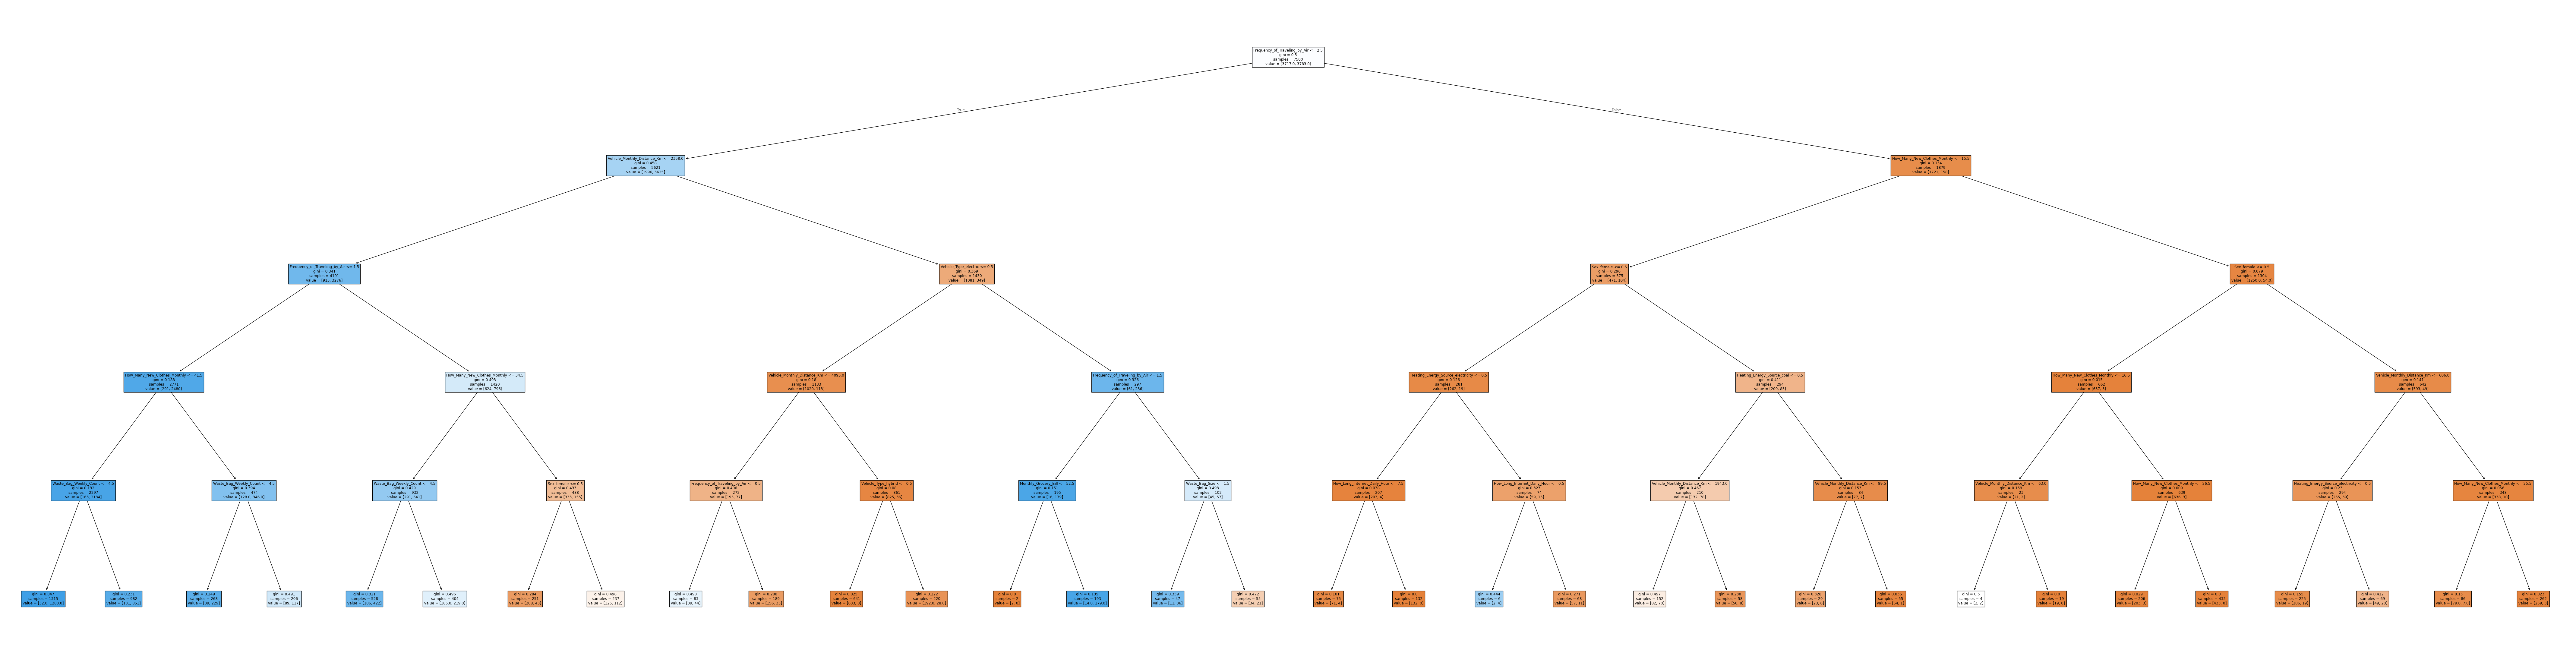

In [17]:


# chatGPT did the programming for me for the plot
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor, plot_tree


#tree.plot_tree(model)
plt.figure(figsize=(110, 28)) # Optional: Set the figure size.       #figsize=(20, 8) for (max_depth=3, min_samples_leaf=5), figsize=(110, 28) for (max_depth=6, min_samples_leaf=5)
plot_tree(model, feature_names=X.columns, filled=True)
plt.show()
